<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_biassed_coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Assume you have access to a function toss_biased() which returns 0 or 1 with a probability that's not 50-50 (but also not 0-100 or 100-0). You do not know the bias of the coin.

Write a function to simulate an unbiased coin toss.

##Solution
To simulate an unbiased coin toss using a biased `toss_biased()` function, we can employ a technique that cancels out the bias. The key idea is to use the biased function twice per simulation and consider only the cases where the two results are different.

Here's how it works:

1. Toss the biased coin twice.
2. If the results are different (one is 0 and the other is 1), then take the first result as the outcome of the unbiased toss. This is because the probability of getting a 0 followed by a 1 is the same as the probability of getting a 1 followed by a 0, regardless of the bias.
3. If the results are the same (both 0 or both 1), ignore them and repeat the process.

The resulting function will have an equal probability of returning 0 or 1. Here is how you can implement this in Python:



In [2]:
import random

def toss_biased():
    """
    Simulates a biased coin toss.
    Let's assume this biased coin has a 70% chance of landing on 1 (heads) and 30% chance of landing on 0 (tails).
    """
    return 1 if random.random() < 0.7 else 0

def simulate_unbiased_toss():
    """
    Simulates an unbiased coin toss using the biased toss_biased function.
    """
    while True:
        toss1 = toss_biased()
        toss2 = toss_biased()
        if toss1 != toss2:
            return toss1

def test_unbiased_toss(iterations=10000):
    """
    Tests the simulate_unbiased_toss function to check its fairness.
    We run the function a specified number of times and record the frequency of 0s and 1s.
    """
    count_0, count_1 = 0, 0
    for _ in range(iterations):
        result = simulate_unbiased_toss()
        if result == 0:
            count_0 += 1
        else:
            count_1 += 1
    return count_0, count_1

# Testing the unbiased toss simulation
test_results = test_unbiased_toss()
test_results



(5068, 4932)

In this implementation, `simulate_unbiased_toss()` will keep calling `toss_biased()` until it gets two different results. When it does, it returns the first result, ensuring an unbiased 50-50 chance of getting either 0 or 1.

##The Biased Coin:
The probability theory behind simulating an unbiased coin toss using a biased coin involves a clever trick to cancel out the bias. Let's delve deeper into the theory:
- Assume the biased coin has a probability `p` of landing heads (which we represent as 1) and a probability `1 - p` of landing tails (0).
- The bias means that `p` is not 0.5, but it's also not 0 or 1.

### The Approach
We use the biased coin to generate pairs of tosses. The four possible outcomes of these two tosses are:

1. Heads, Heads (1, 1)
2. Heads, Tails (1, 0)
3. Tails, Heads (0, 1)
4. Tails, Tails (0, 0)

The probabilities for each of these outcomes are:

1. Probability of Heads, Heads: $ p \times p = p^2 $
2. Probability of Heads, Tails: $ p \times (1 - p) $
3. Probability of Tails, Heads: $ (1 - p) \times p $
4. Probability of Tails, Tails: $ (1 - p) \times (1 - p) = (1 - p)^2 $

### Canceling Out the Bias
- Notice that the probabilities of getting Heads, Tails (1, 0) and Tails, Heads (0, 1) are both $ p \times (1 - p) $. This is crucial.
- Regardless of the value of $ p $ (as long as it's not 0 or 1), the probability of outcome 2 (Heads, Tails) is equal to the probability of outcome 3 (Tails, Heads).
- Therefore, if we only consider these two outcomes and ignore cases where the two tosses are the same (Heads, Heads or Tails, Tails), we effectively have a 50-50 chance of each.

### Implementation in the Algorithm
- In the algorithm, when we toss the coin twice, we are only interested in the cases where the two results are different.
- If the first toss (Heads/Tails) is different from the second toss (Tails/Heads), we use the result of the first toss.
- By doing this, we are effectively selecting between two equally likely outcomes, ensuring an unbiased result.

This approach works elegantly because it leverages the equal probabilities of the cross-over events (Heads followed by Tails and Tails followed by Heads) to negate the effect of the bias in the original coin.

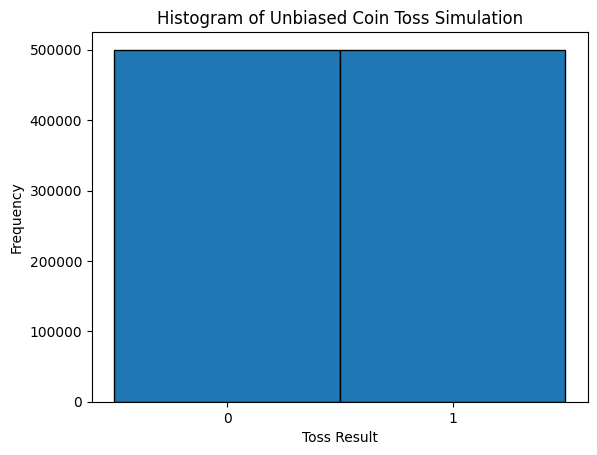

In [3]:
import matplotlib.pyplot as plt

def test_unbiased_toss_large(iterations=1000000):
    """
    Tests the simulate_unbiased_toss function for a large number of iterations.
    """
    results = [simulate_unbiased_toss() for _ in range(iterations)]
    return results

# Running a large number of trials
large_test_results = test_unbiased_toss_large()

# Creating a histogram
plt.hist(large_test_results, bins=[0,1,2], edgecolor='black', align='mid')
plt.xticks([0.5, 1.5], ['0', '1'])
plt.title('Histogram of Unbiased Coin Toss Simulation')
plt.xlabel('Toss Result')
plt.ylabel('Frequency')
plt.show()
